In [ ]:
from PIL import Image
import numpy as np
import os
if os.name == "nt":
    import msvcrt
else:
    import tty
    import termios
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 as cv
import random
from math import log
import math
import pandas
# from google.colab.patches import cv2_imshow
from tqdm import tqdm

$$
f(a,x)=
$$

In [119]:

def f(a, x, rho):
    if x >= 0 and x <= a:
        return math.ceil(rho*x/a)
    elif x > a and x <= rho:
        return math.floor(rho*(rho-x) / (rho-a)) + 1


def rf(a, x, rho):
    if math.floor(a*x/rho) - math.ceil(a*x/rho) + 1 == 0:
        # print("a*x/rho = ",a*x/rho,end=' ')
        if math.floor(a*x/rho)/a > -math.ceil((a/(rho-1)*x))/(rho-a):
            # print(1)
            return math.floor(a*x/rho)
        else:
            # print(2)
            return math.ceil((a/rho-1)*x + rho)
    elif math.floor(a*x/rho) - math.ceil(a*x/rho) == 0:
        return math.floor(a*x/rho)
def assert_arr(arr1,arr2):
    for i in range(0,len(arr1)):
        if arr1[i] != arr2[i]:
            print('i = ',i)
            return False
    return True


### logistic
二者初始值只相差$$ 10^{-10}$$,而路径完全不同

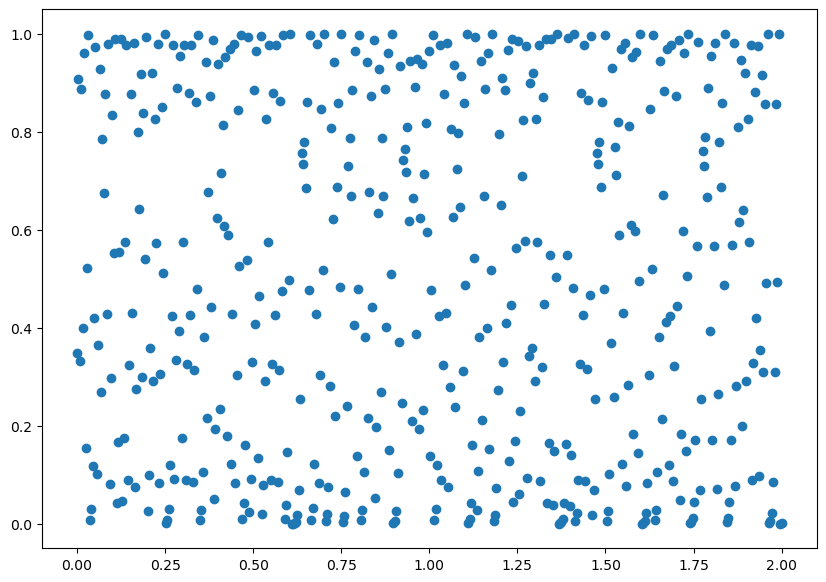

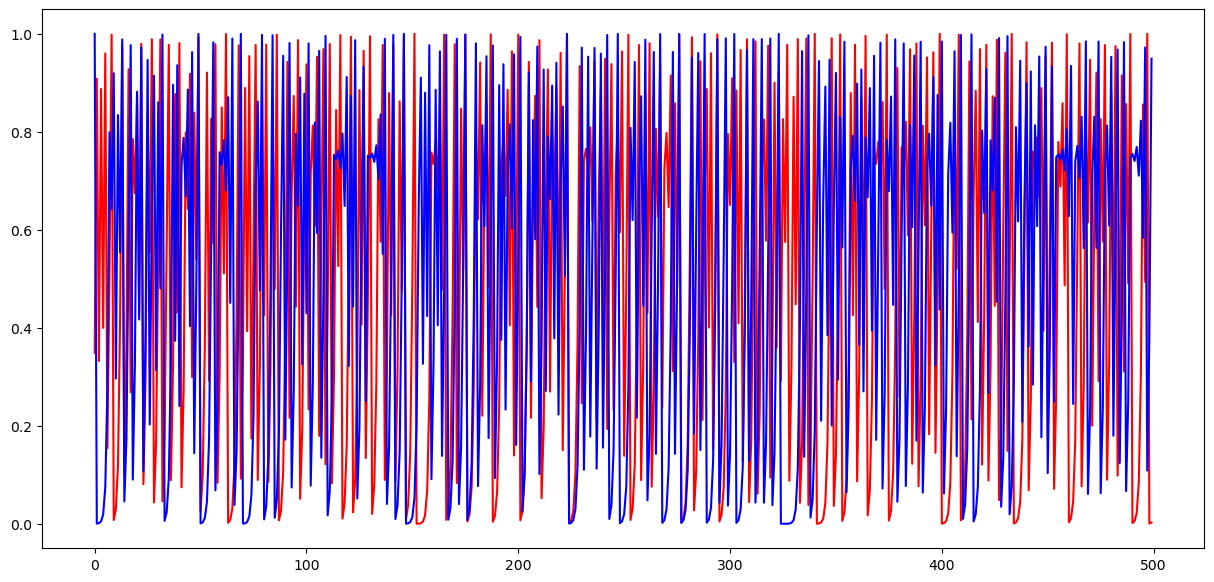

In [116]:

x1_list = []
x2_list = []
r = 4

x1 = 0.2000000000
x2 = 0.1000000001
   # 每个r进行100轮迭代
for t in range(10000):
    x1 = r * x1 * (1-x1)
    x2 = r * x2 * (1-x2)
for t in range(500):
    x1 = r * x1 * (1-x1)
    x2 = r * x2 * (1-x2)
    x1_list.append(x1)
    x2_list.append(x2)
fig = plt.figure(figsize=(10, 7))

xticks = np.linspace(0,2,500)
plt.scatter(xticks,x1_list)
plt.show()
plt.figure(figsize=(15, 7))
plt.plot(x1_list, color='r')
plt.plot(x2_list, color='b')
plt.show()


[2, 2, 4, 3, 13, 21, 219, 109, 165, 22, 186, 49, 196, 110, 119, 124, 159, 9, 30, 126, 249, 252, 254, 248, 223, 84, 95, 167, 23, 211, 81, 125, 2, 12, 13, 25, 185, 40, 110, 30, 64, 75, 76, 215, 84, 113, 15, 45, 234, 129, 43, 11, 9, 14, 153, 176, 12, 19, 209, 90, 221, 114, 175, 35, 143, 4, 86, 91, 133, 2, 4, 2, 3, 5, 88, 100, 180, 40, 199, 9, 8, 11, 241, 197, 8, 9, 14, 209, 104, 14, 117, 156, 7, 29, 81, 95, 169, 25, 214, 85, 118, 8, 28, 92, 120, 161, 11, 60, 125, 3, 12, 19, 209, 91, 226, 129, 187, 53, 94, 28, 156, 225, 146, 5, 43, 57, 161, 247, 222, 119, 193, 65, 73, 83, 219, 101, 145, 4, 34, 46, 213, 43, 35, 32, 45, 241, 256, 128, 29, 7, 9, 15, 204, 91, 24, 173, 32, 158, 9, 32, 116, 135, 153, 72, 76, 123, 2, 96, 75, 78, 118, 4, 37, 48, 252, 256, 254, 251, 242, 203, 31, 33, 78, 62, 226, 84, 94, 149, 8, 236, 181, 36, 133, 75, 90, 208, 81, 161, 13, 89, 139, 3, 255, 247, 243, 250, 232, 139, 172, 13, 27, 171, 24, 111, 219, 120, 126, 146, 142, 144, 185, 45, 255, 256, 256, 256, 86, 79, 84, 115,

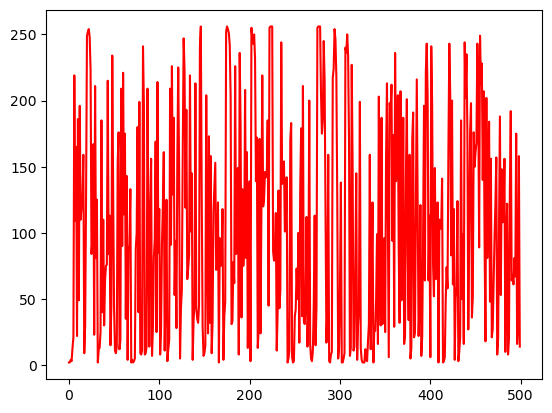

In [144]:
# logist 生成的
rho = 256

b = 1.0001 # 决定a
y0 = 131
y = y0
curr_a = 0
n1 = 123

y_list = []
a_list = []
h = 256 * 256
x_list = []
for i in range(len(x2_list)):
    a_list.append(math.floor(x1_list[i] * 256))
    x_list.append(math.ceil(x2_list[i] * 255))
for i in range(len(x1_list)):
    y0 = f(a_list[i],x_list[i],rho)
    y_list.append(y0)

print(y_list)
print(a_list)
plt.plot(y_list, color='r')
plt.show()

In [145]:
print(x2_list)
ry_list = []
for i in range(len(x1_list)):
    y0 = rf(a_list[i],y_list[i],rho)
    ry_list.append(y0)
print("a_list  : ",a_list)
print("y_list  : ",y_list)
print("ry_list : ",ry_list)
print("x_list  : ",x_list)
assert_arr(ry_list,y_list)

[0.9999253213327035, 0.0002986923615725654, 0.0011944125777828144, 0.004771943825507394, 0.018996689510534383, 0.07454326119269894, 0.275946253613824, 0.7991996749212766, 0.6419182181080095, 0.9194368774761897, 0.29629082325209516, 0.8340102852347635, 0.5537485174295677, 0.9884443874964939, 0.04568832129269973, 0.17440359436061909, 0.575947922538863, 0.9769276522481235, 0.09016005808437191, 0.3281248880423784, 0.8818357835582201, 0.41680573757792033, 0.9723148588001845, 0.10767469662624699, 0.38432342533077063, 0.9464757202911769, 0.20263772476189915, 0.6463027090608798, 0.9143820692857902, 0.31315000261770615, 0.8603483139129472, 0.4805963706403843, 0.9984939966706986, 0.006014941133094122, 0.02391504646503814, 0.09337246807045282, 0.33861620110754037, 0.8958210778201525, 0.37330269741317107, 0.9357911740688861, 0.24034421041464718, 0.7303154837392279, 0.7878191117998617, 0.6686406355309548, 0.8862413441908628, 0.40327049615054195, 0.9625736123401506, 0.1441026126663363, 0.49334819875

False